# POLSCI 3 Fall 2021

## Week 11, Lecture Notebook 1: Multivariate Regression with Observational Data

In [1]:
library(ggplot2) # Allow us to make some graphs later

data <- read.csv("ps3-house-election-spending.csv")
head(data)

,state,district,name_dem_cand,name_rep_cand,dem_us_house_percent_2020,dem_us_house_percent_2018,dem_won_ushouse_2018,clinton_percent_2016,spending_dem_ushouse_2020,spending_rep_ushouse_2020
,<chr>,<int>,<chr>,<chr>,<dbl>,<dbl>,<int>,<dbl>,<dbl>,<dbl>
1,AL,1,"GARDNER, KIANI A","CARL, JERRY LEE, JR",35.53871,36.77648,0,34.93852,0.11866185,2.2325439
2,AL,2,"HARVEY-HALL, PHYLLIS","COLEMAN, JEFF",34.68272,38.42594,0,33.70786,0.05766116,2.6159773
3,AL,3,"WINFREY, ADIA","ROGERS, MICHAEL",32.45933,36.21845,0,33.09426,0.04122109,1.2283404
4,AL,4,"NEIGHBORS, RICKY","ADERHOLT, ROBERT B. REP.",17.68298,20.12911,0,17.79141,0.04790858,1.3521382
5,AL,5,"JOFFRION, PETER S.","BROOKS, MO",0.00000,38.89471,0,32.60417,0.00310696,0.2237067
6,AR,1,"CAUSEY, CHAD","CRAWFORD, ERIC ALAN RICK",0.00000,28.77438,0,31.72269,0.00060000,1.0955175


Here is a quick rundown of what each column means:

- `state`: State (e.g., for CA-13, "CA")
- `district`: District number (e.g., for CA-13, 13)
- `name_dem_cand`: Democrat candidate name in the 2020 US House elections
- `name_rep_cand`: Republican candidate name in the 2020 US House elections
- `dem_us_house_percent_2020`: Democrat candidate's vote share in 2020 election (percent)
- `dem_us_house_percent_2018`: Democrat candidate's vote share in 2018 election (percent)
- `dem_won_ushouse_2018`: A Democrat won the US House election in 2018, and so is running for re-election in 2020 (0 = lost, 1 = won)
- `clinton_percent_2016`: Clinton vote share in 2016 in the district (percent)
- `spending_dem_ushouse_2020`: Democratic US House candidate's spending in 2020, in millions of dollars 
- `spending_rep_ushouse_2020`: Republican US House candidate's spending in 2020, in millions of dollars 

`geom_smooth()` using formula 'y ~ x'



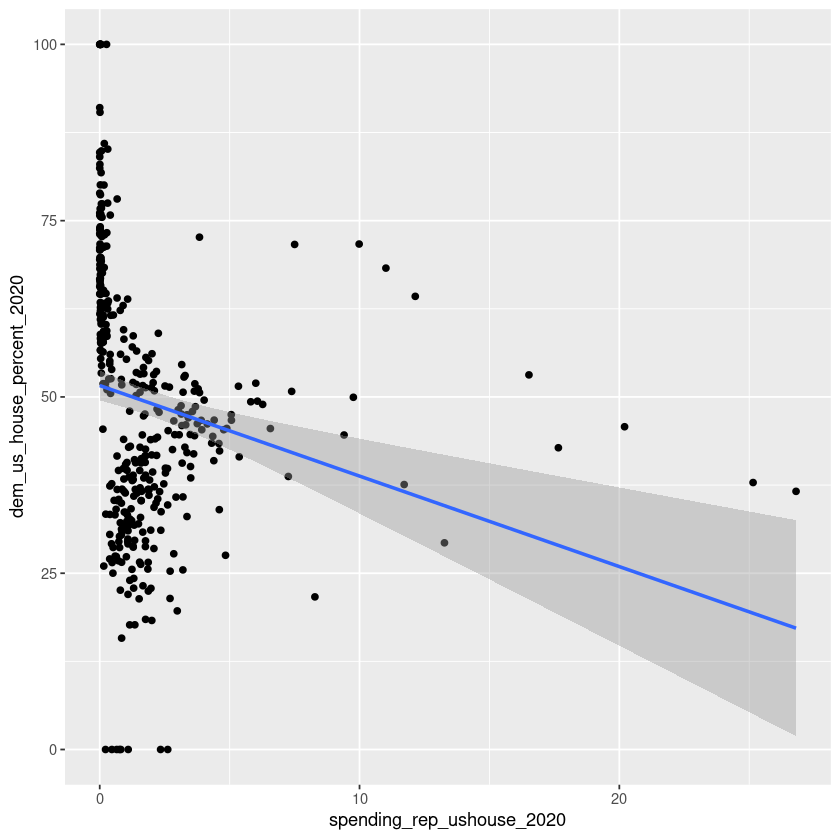

In [2]:
# Create a scatterplot between Republican US House candidate spending in 2020 (independent variable) 
# and Democratic US House vote share in 2020 (dependent variable) and add a regression line
plot.rep_spending.dem_vote <- qplot(spending_rep_ushouse_2020, dem_us_house_percent_2020, data = data) +
geom_smooth(method = "lm")
plot.rep_spending.dem_vote

In [3]:
# Compute the bivariate regression
lm.rep_spending.dem_vote <- summary(lm(dem_us_house_percent_2020 ~ spending_rep_ushouse_2020, data = data))
lm.rep_spending.dem_vote


Call:
lm(formula = dem_us_house_percent_2020 ~ spending_rep_ushouse_2020, 
    data = data)

Residuals:
    Min      1Q  Median      3Q     Max 
-51.328 -13.382   1.007  11.703  48.721 

Coefficients:
                          Estimate Std. Error t value Pr(>|t|)    
(Intercept)                51.6152     1.0744  48.041  < 2e-16 ***
spending_rep_ushouse_2020  -1.2839     0.3095  -4.148  4.1e-05 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 18.45 on 401 degrees of freedom
Multiple R-squared:  0.04114,	Adjusted R-squared:  0.03875 
F-statistic:  17.2 on 1 and 401 DF,  p-value: 4.099e-05


In [4]:
# How well would we expect the Democrats to perform if the Republicans spent 10 million dollars?
prediction.10million <- -1.2839*10 + 51.6152
prediction.10million

[1] 38.7762

In [5]:
# Now, control for Democratic spending in 2020
lm.rep_spending.dem_vote.controls <- summary(lm(dem_us_house_percent_2020 ~ spending_rep_ushouse_2020 + spending_dem_ushouse_2020, data = data))
lm.rep_spending.dem_vote.controls


Call:
lm(formula = dem_us_house_percent_2020 ~ spending_rep_ushouse_2020 + 
    spending_dem_ushouse_2020, data = data)

Residuals:
   Min     1Q Median     3Q    Max 
-48.90 -11.18  -2.25  12.13  49.80 

Coefficients:
                          Estimate Std. Error t value Pr(>|t|)    
(Intercept)                49.2611     1.1568  42.584  < 2e-16 ***
spending_rep_ushouse_2020  -1.6495     0.3110  -5.303 1.89e-07 ***
spending_dem_ushouse_2020   1.4443     0.3026   4.773 2.55e-06 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 17.97 on 400 degrees of freedom
Multiple R-squared:  0.0928,	Adjusted R-squared:  0.08826 
F-statistic: 20.46 on 2 and 400 DF,  p-value: 3.473e-09


In [6]:
# Now, add another control: How well the Democrats did in 2018
lm.rep_spending.dem_vote.controls <- summary(lm(dem_us_house_percent_2020 ~ spending_rep_ushouse_2020 + spending_dem_ushouse_2020 + dem_us_house_percent_2018, data = data))
lm.rep_spending.dem_vote.controls


Call:
lm(formula = dem_us_house_percent_2020 ~ spending_rep_ushouse_2020 + 
    spending_dem_ushouse_2020 + dem_us_house_percent_2018, data = data)

Residuals:
    Min      1Q  Median      3Q     Max 
-38.763  -3.693  -0.281   3.945  56.790 

Coefficients:
                          Estimate Std. Error t value Pr(>|t|)    
(Intercept)                8.50035    1.62606   5.228 2.78e-07 ***
spending_rep_ushouse_2020 -0.08570    0.19123  -0.448    0.654    
spending_dem_ushouse_2020  0.27968    0.18264   1.531    0.126    
dem_us_house_percent_2018  0.76683    0.02779  27.589  < 2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 10.55 on 399 degrees of freedom
Multiple R-squared:  0.688,	Adjusted R-squared:  0.6857 
F-statistic: 293.3 on 3 and 399 DF,  p-value: < 2.2e-16


In [ ]:
# WRITE YOUR CODE HERE

In [ ]:
# WRITE YOUR CODE HERE

In [ ]:
# WRITE YOUR CODE HERE

In [ ]:
# WRITE YOUR CODE HERE

In [ ]:
# WRITE YOUR CODE HERE